In [2]:
# Data Load 
from tensorflow.keras.datasets import imdb

num_words=10000

(x_train,y_train),(x_val,y_val) = imdb.load_data(num_words=num_words)


In [6]:
# Data Preprocessing

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

x_train = pad_sequences(x_train,maxlen=max_len)
x_val = pad_sequences(x_val,maxlen=max_len)
print(x_train.shape)


(25000, 500)


In [14]:
#Create Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D,MaxPooling1D,GlobalMaxPooling1D

model=Sequential()
model.add(Embedding(input_dim = num_words,output_dim = 32, input_length=max_len))
# 다음층이 바로 RNN 층이 아니기 때문에 input_length 직접 설정 
model.add(Conv1D(filters=32,kernel_size=7,activation="relu"))
model.add(MaxPooling1D(pool_size=7))
model.add(Conv1D(32,5,activation = "relu"))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [15]:
#Learning Model
history = model.fit(x_train,y_train,
                   batch_size=32,
                   epochs=30,
                   validation_data=(x_val,y_val))

Epoch 1/30
782/782 [==============================] - 21s 26ms/step - loss: 0.4500 - acc: 0.7670 - val_loss: 0.3311 - val_acc: 0.8548
Epoch 2/30
782/782 [==============================] - 20s 25ms/step - loss: 0.2335 - acc: 0.9089 - val_loss: 0.3269 - val_acc: 0.8638
Epoch 3/30
782/782 [==============================] - 21s 26ms/step - loss: 0.1451 - acc: 0.9492 - val_loss: 0.3723 - val_acc: 0.8561
Epoch 4/30
782/782 [==============================] - 20s 25ms/step - loss: 0.0761 - acc: 0.9748 - val_loss: 0.4807 - val_acc: 0.8496
Epoch 5/30
634/782 [=======================>......] - ETA: 3s - loss: 0.0304 - acc: 0.9920

KeyboardInterrupt: 

In [ ]:
# Visualize Learning

import matplotlib.pyplot as plt

his_dict = history.history

loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)

acc = his_dict['acc']
val_acc = his_dict['val_acc']

fig = plt.figure(figsize=(15,7))

ax1 = fig.subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val LOSS')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2 = fig.subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train and val ACC')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

fig.show()

In [17]:
#COS 함수로 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30*12+1)
month_time = (time%30) / 30
time_series = 20 * np.where(month_time <0.5,
                           np.cos(2*np.pi*month_time),
                            np.cos(2*np.pi*month_time)+np.random.random(361))


# Data Preprocessing 
def make_sequence(time_series,n):
    x_train,y_train = list(),list()
    for i in range(len(time_series)):
        x = time_series[i:i+n]
        if i+n < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
    return np.array(x_train),np.array(y_train)

n=10

x_train, y_train = make_sequence(time_series,n)

x_train = x_train.reshape(-1,n,1)
y_train = y_train.reshape(-1,1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]
x_test = x_train[30*11:]
y_test = y_train[30*11:]

Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 238.1749 - mse: 238.1749
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 216.5325 - mse: 216.5325
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 194.0660 - mse: 194.0660
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 171.3102 - mse: 171.3102
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 150.0608 - mse: 150.0608
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 133.1010 - mse: 133.1010
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 118.5671 - mse: 118.5671
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 110.1631 - mse: 110.1631
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 101.9541 - mse: 101.9541
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 96.4237 - mse: 96.4237
Epoch 11/200
11/11 [=

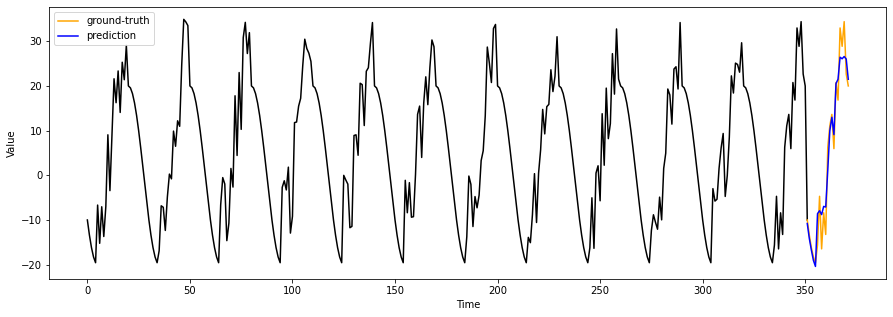

In [20]:
#Create Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(filters = 32,kernel_size = 3,activation = 'relu',input_shape=(10,1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(filters = 32,kernel_size = 3,activation = 'relu'))
model.add(LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1))


model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mse']) 

#Learning Model
model.fit(x_train,y_train,epochs=200,batch_size=32)

#Visualize

pred = model.predict(x_test)

train_range = np.arange(len(x_train)+1)
pred_range = np.arange(len(y_train),len(y_train)+len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range,np.append(y_train,y_test[0]),color='black')
plt.plot(pred_range,y_test,color='orange',label='ground-truth')
plt.plot(pred_range,pred,color='blue',label='prediction')
plt.legend()
plt.show()